> IDEAS
- 맵을 저장하는 데이터 형태를 어떻게 할 것인가? 
 - x, y쌍을 맵으로 놓고 사잇값에 대해서는 내적으로 계산하는 접근
 - piecewise linear형태로 구간별 선형 모형 설계
- 오차를 줄이는 방법은? 
 - 오차분석 필요
 - polynomial regression의 오차 특성은? 양 극단에서 오차가 커지는 이유는? 이를 커버하는 방법은?
- chart는 어떤걸 그리나? 
 - 잔차 plot(time-step)
 - 잔차 크기에 따른 빈도
 - U, W, V - timestep plot
 - p104, X크기에 따른 잔차 plot


> TODO
- 우선 맵 및 공식 전달

In [1]:
import pandas as pd
import os
import numpy as np


print(os.getcwd())

C:\My\Playground\Github\pg\_chaos


In [2]:
df = pd.read_excel(io='sample800.xlsx', sheet_name='Sheet1')
df['Order'] = np.floor(df['G'] * 10)
df = df.sort_values(['Order']).reset_index(drop=True)
df

,reg_date,G,U,W,V,Direction,Order
0,2018-04-17 18:33:20:042,-2.669923,4.528887,4.555299,0.653248,0,-27.0
1,2018-04-17 18:33:10:551,-2.670843,4.531837,4.556723,0.652623,0,-27.0
2,2018-04-17 18:33:11:042,-2.670704,4.530816,4.556635,0.652568,0,-27.0
3,2018-04-17 18:33:11:542,-2.670641,4.531472,4.556320,0.648680,0,-27.0
4,2018-04-17 18:33:12:042,-2.670540,4.530640,4.558072,0.649285,0,-27.0
5,2018-04-17 18:33:12:542,-2.670477,4.528749,4.558085,0.649081,0,-27.0
6,2018-04-17 18:33:13:042,-2.670389,4.531068,4.557530,0.648123,0,-27.0
7,2018-04-17 18:33:13:542,-2.670339,4.529593,4.557631,0.651823,0,-27.0
8,2018-04-17 18:33:14:042,-2.670288,4.529429,4.557316,0.652150,0,-27.0
9,2018-04-17 18:33:14:542,-2.670263,4.529883,4.558362,0.650590,0,-27.0


###### Tools

In [3]:
from sklearn import metrics
'''
metrics.explained_variance_score
metrics.mean_absolute_error
metrics.mean_squared_error
metrics.mean_squared_log_error
metrics.median_absolute_error
metrics.r2_score
'''

def print_metrics(actual, pred):
    actual = np.array(actual) if isinstance(actual, list) else actual
    pred = np.array(pred) if isinstance(pred, list) else pred

    actual = actual.reshape(-1, 1) if len(actual.shape) == 1 else actual
    pred = pred.reshape(-1, 1) if len(pred.shape) == 1 else pred
    
    evs = metrics.explained_variance_score(actual, pred)
    mse = metrics.mean_squared_error(actual, pred)
    mse_ppm = mse * 1e6 / 800
    mae = metrics.mean_absolute_error(actual, pred)
    mae_ppm = mae * 1e6 / 800
    r2 = metrics.r2_score(actual, pred)
    max_abs_err = float(np.max(np.abs(actual - pred)))
    
    print('MSE:     :', mse)
    print('MSE ppm  :', mse_ppm)
    print('MAE:     :', mae)
    print('MAE ppm  :', mae_ppm)
    print('Max er   :', max_abs_err)
    print('EVS:     :', mae)
    print('R2 score :', r2)
    

In [4]:
print_metrics([1, 2, 3], [1.1, 1.9, 3])

MSE:     : 0.006666666666666678
MSE ppm  : 8.333333333333348
MAE:     : 0.06666666666666672
MAE ppm  : 83.3333333333334
Max er   : 0.10000000000000009
EVS:     : 0.06666666666666672
R2 score : 0.99


### model - poly reg

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


dataset_X = df[['U']]
dataset_y = df[['G']] / 5 * 1500

In [6]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(dataset_X, dataset_y, test_size=0.33, random_state=42, shuffle=True)

###### plot training set

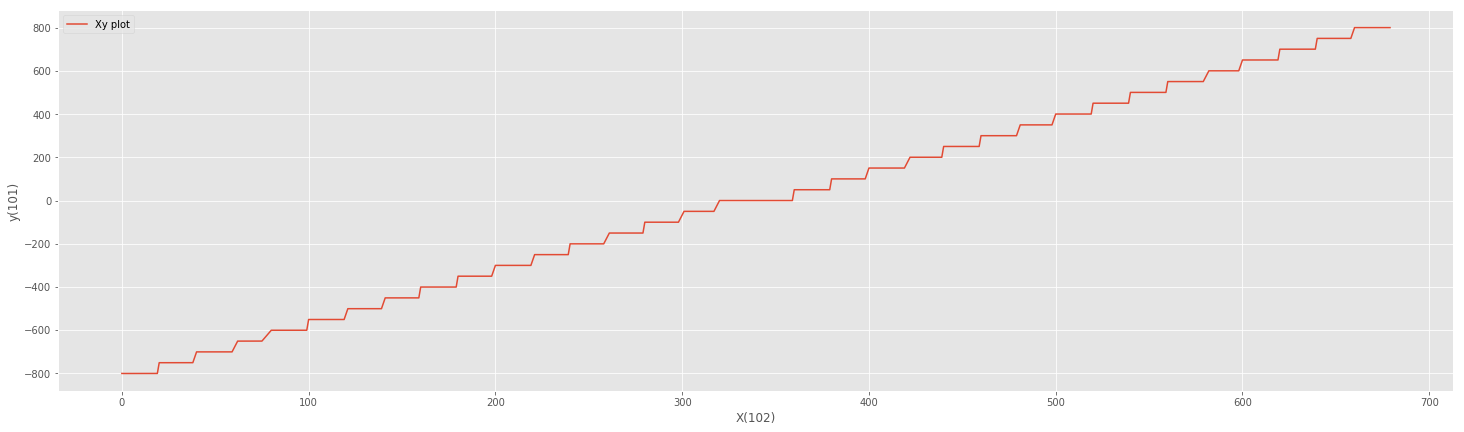

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
# plt_x = range(len(training_set_X))
plt_x = training_set_X.sort_index().index
plt.plot(plt_x, (training_set_y.sort_index()), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


###### Ordinary Least Squares

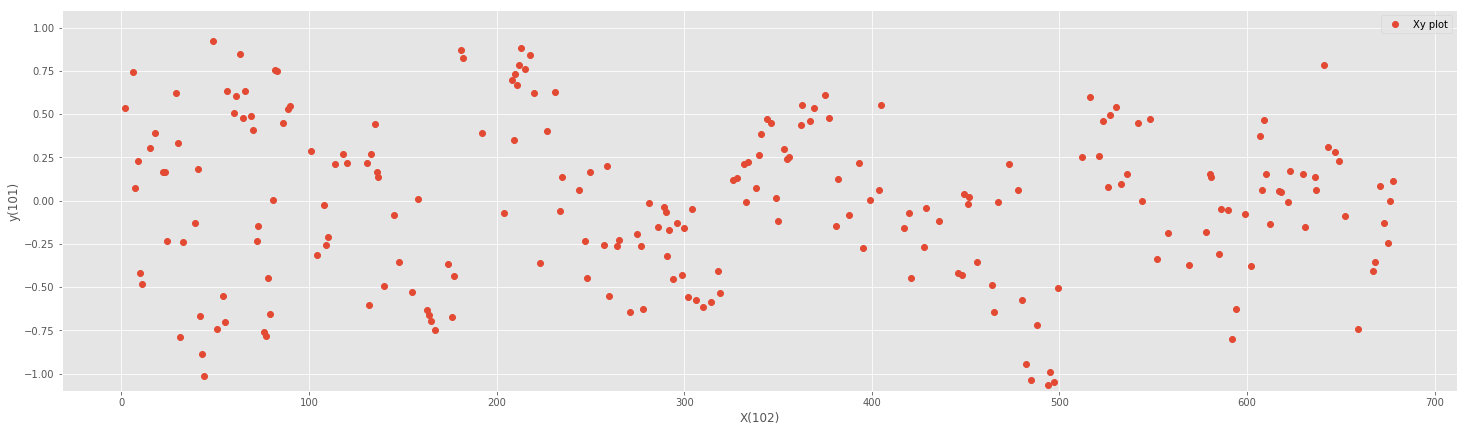

MSE:     : 0.21896920327452998
MSE ppm  : 273.7115040931625
MAE:     : 0.3787939088599921
MAE ppm  : 473.4923860749901
Max er   : 1.361012523907391
EVS:     : 0.3787939088599921
R2 score : 0.9999990583401398


In [100]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


poly = PolynomialFeatures(degree=10)
training_set_X_poly_reg = poly.fit_transform(training_set_X)
test_set_X_poly_reg = poly.fit_transform(test_set_X.sort_index())  # sorted by index

model_poly_reg = linear_model.LinearRegression(normalize=True)
model_poly_reg.fit(training_set_X_poly_reg, training_set_y)
test_set_pred_poly_reg = model_poly_reg.predict(test_set_X_poly_reg)

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt.ylim(ymax=1.1, ymin=-1.1)
# plt_x = range(len(test_set_X))
plt_x = test_set_X.sort_index().index
plt.plot(plt_x
         , (test_set_y.sort_index() - test_set_pred_poly_reg)
         , label='Xy plot'
         , linestyle='None'
         , marker='o')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()

print_metrics(test_set_y.sort_index(), test_set_pred_poly_reg)

###### plot - test set

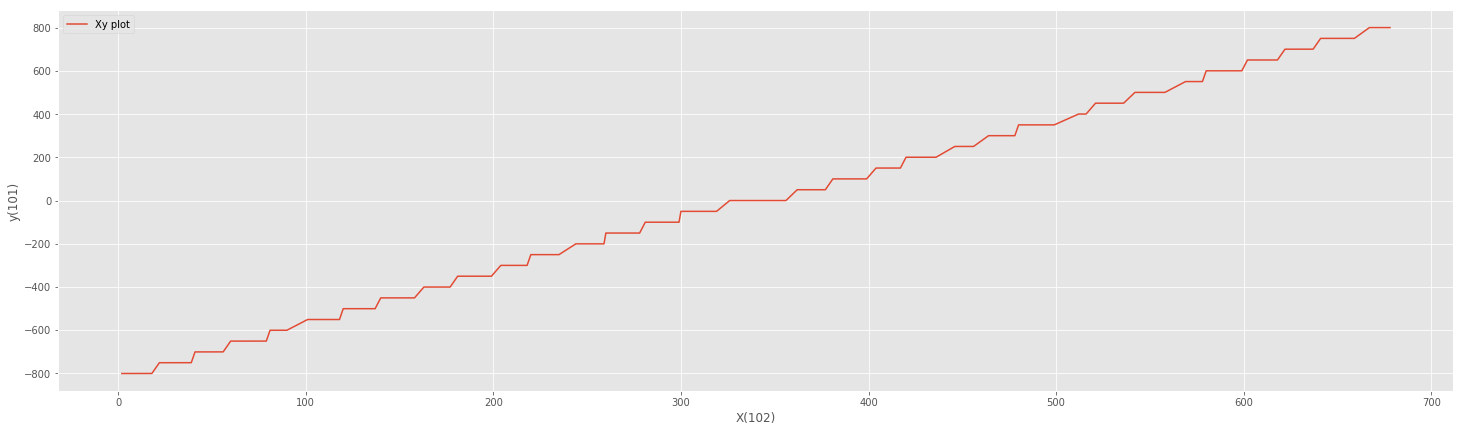

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
# plt_x = range(len(training_set_X))
plt_x = test_set_X.sort_index().index
plt.plot(plt_x, (test_set_y.sort_index()), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


- expected gold error: 1ppm = 800 / 1000000 = 0.0008
- normal silver error: 1% = 800 / 100 = 8

In [10]:
np.min(df['U']), np.max(df['U'])

(0.61645213, 4.5318373)

### grid

In [48]:
grid_x_start = 0.
grid_x_end = 5.

In [49]:
num_slice = 1000
grid_x_val, spacing = np.linspace(start=grid_x_start, stop=grid_x_end, num=num_slice, endpoint=True, retstep=True)

In [50]:
spacing = 0.005
grid_x_val = np.arange(start=grid_x_start
                   , stop=grid_x_end
                   , step=spacing)

In [51]:
len(grid_x_val)

1000

In [52]:
grid_x_val[0]

0.0

In [47]:
grid_x_val[1]

0.005

In [53]:
grid_x_val_poly_reg = poly.fit_transform(grid_x_val.reshape(-1, 1))
grid_y_val_poly_reg_pred = model_poly_reg.predict(grid_x_val_poly_reg)

In [72]:
def get_bound(grid_x_val, input_x):
    for i in range(len(grid_x_val)-1):
        if grid_x_val[i] <= input_x and input_x <= grid_x_val[i+1]:
            lower = grid_x_val[i]
            upper = grid_x_val[i+1]
            break      
    interval = upper - lower

    # print(lower ,upper, interval)
    
    ip_b = (upper - input_x) / interval
    ip_a = 1 - ip_b
    return i, i+1, ip_a, ip_b

get_bound(grid_x_val, input_x=3.1211)

(624, 625, 0.22000000000002484, 0.7799999999999752)

In [71]:
def get_bound_fixed_slicing(range_start, range_end, spacing, input_x):
    steps = int((input_x - range_start) / spacing)
    
    lower = steps * spacing
    upper = lower + spacing
    
    interval = spacing
    ip_b = (upper - input_x) / interval
    ip_a = 1 - ip_b
    
    # print(lower, upper, interval)
    
    return steps, steps+1, ip_a, ip_b
    

get_bound_fixed_slicing(grid_x_start, grid_x_end, spacing, 3.1211)

(624, 625, 0.2200000000000415, 0.7799999999999585)

In [75]:
def grid_inner_pred(input_x, grid_x_val, grid_y):
    
    lower_idx, upper_idx, ip_a, ip_b = get_bound(grid_x_val, input_x)
    lower_y = grid_y[lower_idx]
    upper_y = grid_y[upper_idx]
    
    return lower_y * ip_a + upper_y * ip_b

In [77]:
grid_inner_pred(3, grid_x_val, grid_y_val_poly_reg_pred)

array([-168.48925071])

In [81]:
xy = np.concatenate((grid_x_val.reshape(-1, 1), grid_y_val_poly_reg_pred), axis=1)

In [82]:
np.savetxt("foo.csv", xy, delimiter=",")

In [80]:
import os
os.getcwd()

'C:\\My\\Playground\\Github\\pg\\_chaos'

In [83]:
1e20

1e+20